In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

goog = pd.read_csv('google_stocks_2005_2021.csv', index_col='Date', parse_dates=True)
print(type(goog.index)) # <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [2]:
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,101.439781,97.365051,98.331429,100.976517,31807176.0,100.976517
2005-01-04,101.086105,96.378746,100.323959,96.886841,27614921.0,96.886841
2005-01-05,98.082359,95.756081,96.363808,96.393692,16534946.0,96.393692
2005-01-06,97.584229,93.509506,97.175758,93.922951,20852067.0,93.922951
2005-01-07,96.762314,94.037521,94.964050,96.563057,19398238.0,96.563057


<Axes: xlabel='Date', ylabel='Close'>

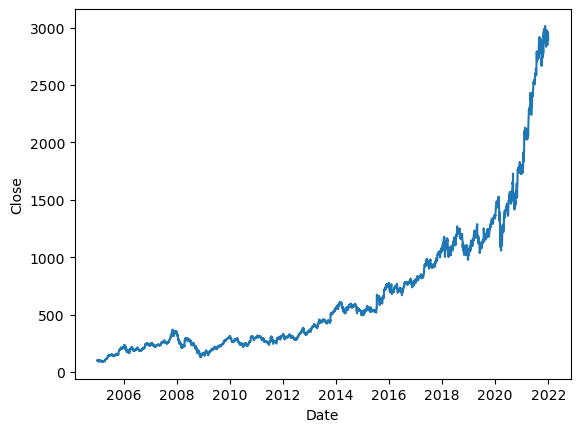

In [3]:
fig, ax = plt.subplots()
sns.lineplot(data=goog, x=goog.index, y='Close')

<Axes: xlabel='Date'>

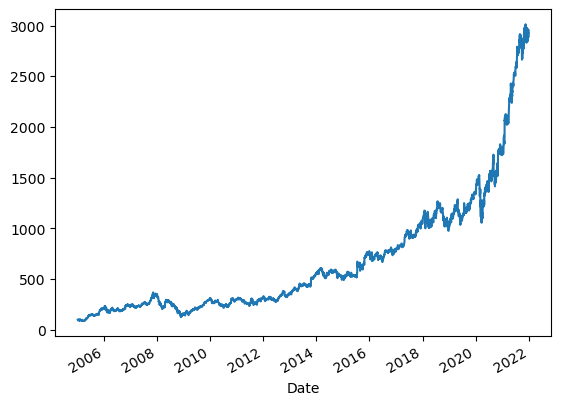

In [4]:
goog = goog['Close']
fig, ax = plt.subplots()
goog.plot()

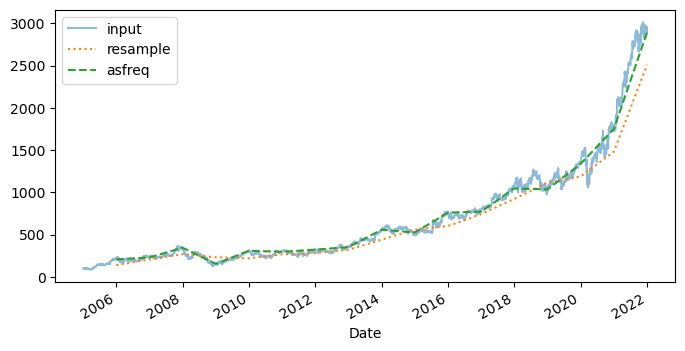

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
goog.plot(alpha=0.5, style='-')
goog.resample('BYE').mean().plot(style=':')
goog.asfreq('BYE').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

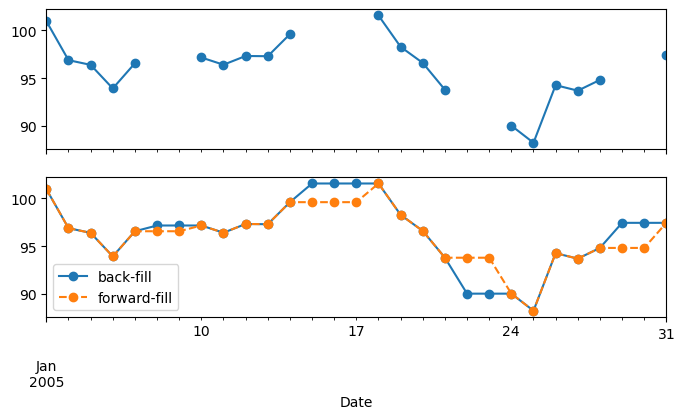

In [6]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,4))
data = goog.iloc[:20]
# Up-sampling without filling (default action) 
data.asfreq('D').plot(ax=axs[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=axs[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=axs[1], style='--o')
axs[1].legend(["back-fill", "forward-fill"])

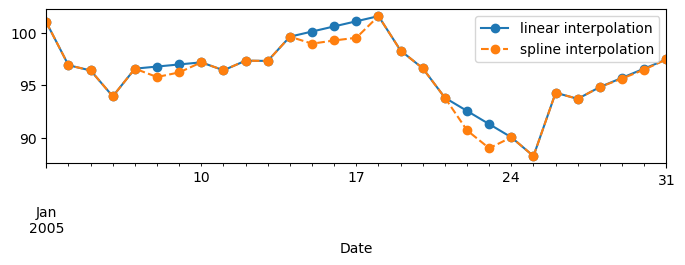

In [7]:
fig, ax = plt.subplots(figsize=(8,2))
data = goog.iloc[:20]

data.resample('D').interpolate(method='linear').plot(style='-o')
data.resample('D').interpolate(method='spline',order=2).plot(style='--o')
ax.legend(["linear interpolation", "spline interpolation"])

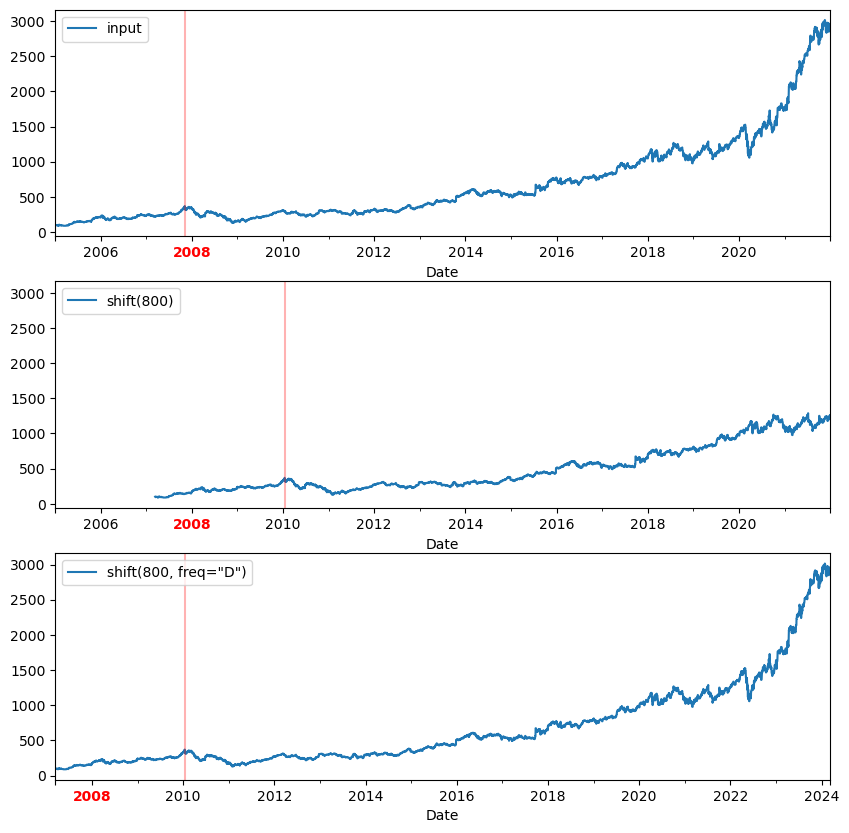

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharey=True)

# fill-in weekends
goog_filled = goog.asfreq('D', method='ffill')

goog_filled.plot(ax=axs[0])
goog_filled.shift(periods=800).plot(ax=axs[1])
goog_filled.shift(periods=800, freq='D').plot(ax=axs[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(800, 'D')

axs[0].legend(['input'], loc='upper left')
axs[0].get_xticklabels()[2].set(weight='heavy', color='red')
axs[0].axvline(local_max, alpha=0.3, color='red')

axs[1].legend(['shift(800)'], loc='upper left')
axs[1].get_xticklabels()[2].set(weight='heavy', color='red')
axs[1].axvline(local_max + offset, alpha=0.3, color='red')

axs[2].legend(['shift(800, freq="D")'], loc='upper left')
axs[2].get_xticklabels()[1].set(weight='heavy', color='red')
axs[2].axvline(local_max + offset, alpha=0.3, color='red')

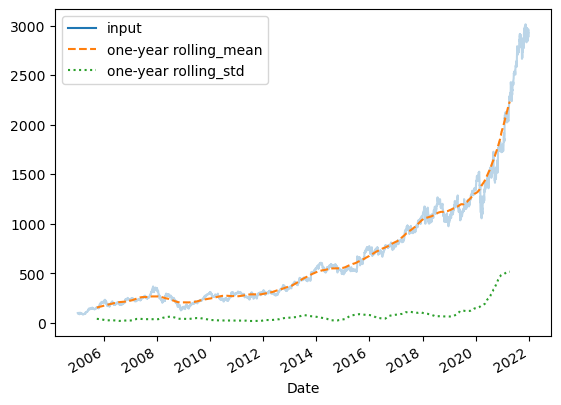

In [9]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

<Axes: xlabel='Month'>

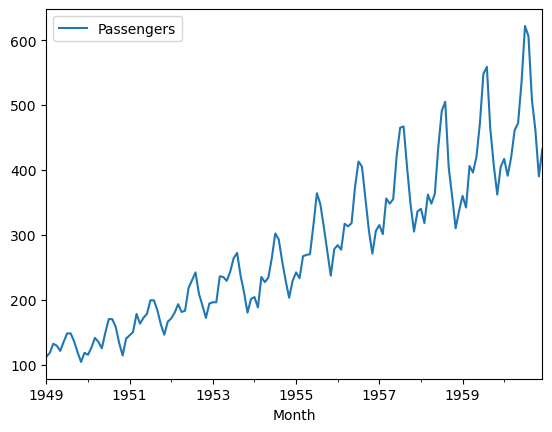

In [10]:
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=True)
# plot original timeseries
df.plot()

C:\Users\admin\AppData\Local\Temp\ipykernel_22204\3752451510.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(np.random.choice(range(-1000,1000),10000))


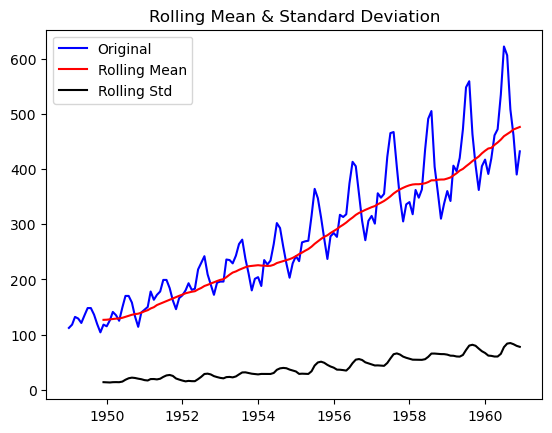

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Results of KPSS Test:
Test Statistic           1.651312
p-value                  0.010000
#Lags Used               8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_22204\3752451510.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [11]:
# statistical test to show trend and seasonality because the graph is a clear indication
from statsmodels.tsa.stattools import adfuller, kpss
kpss(np.random.choice(range(-1000,1000),10000))

# Augmented Dickey-Fuller (ADF) test
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
# Check time series stationarity
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    # plot standard deviation instead of variance to keep the unit similar to mean
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    adf_test(timeseries)
    #Perform KPSS test:
    kpss_test(timeseries)

ts = df['Passengers']
test_stationarity(ts)

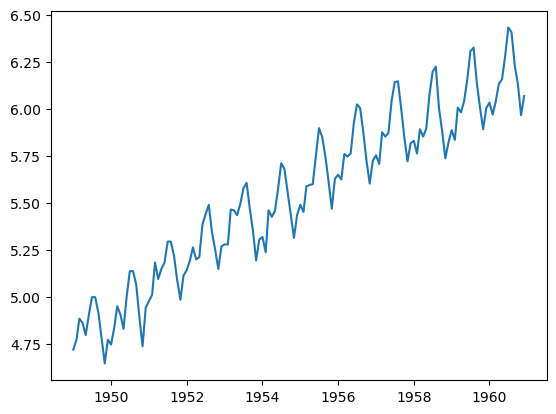

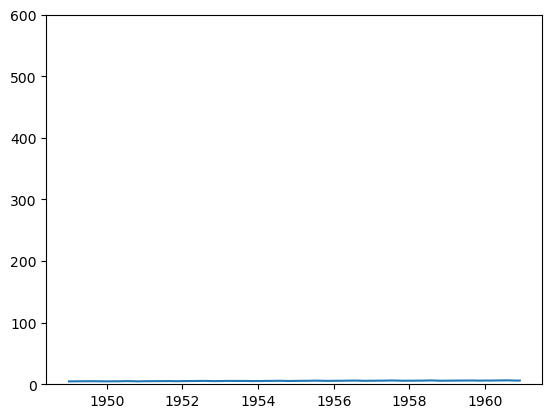

In [12]:
# remove trend by log transformation
import numpy as np
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

plt.plot(ts_log)
plt.ylim(0,600)
plt.show()

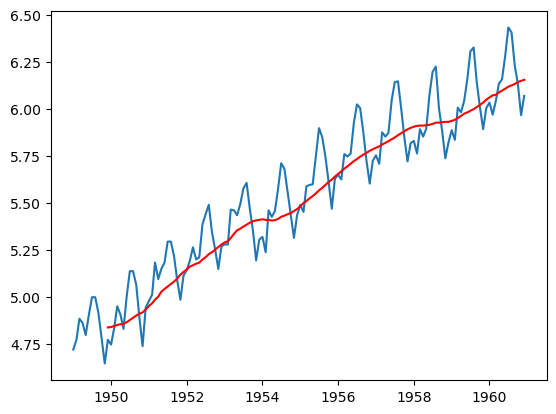

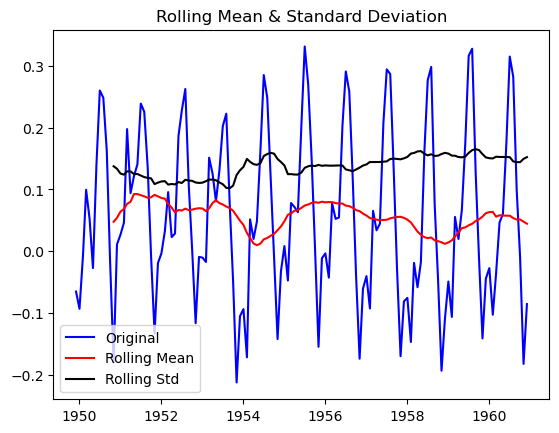

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64
Results of KPSS Test:
Test Statistic           0.04306
p-value                  0.10000
#Lags Used               5.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_22204\3752451510.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [13]:
# remove trend by smoothing using moving average
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()
# subtract rolling mean from the original series
ts_log_moving_avg_diff = ts_log - moving_avg
# see that rolling mean is not defined for first 11 values
ts_log_moving_avg_diff.head(12)
# drop these NaN values and check the plots to test stationarity
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

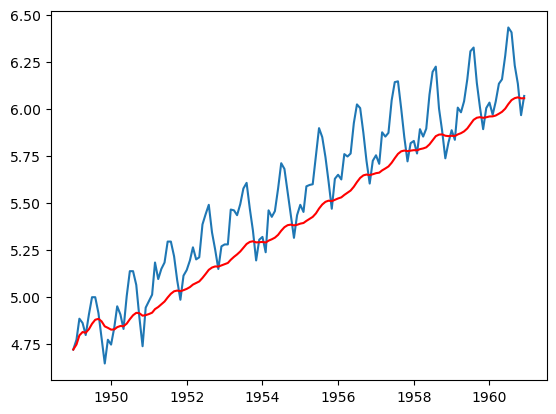

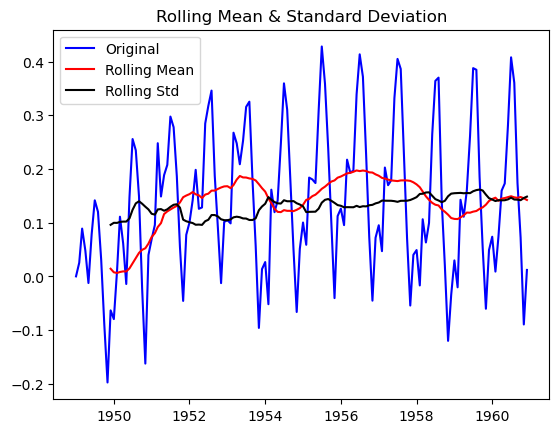

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Results of KPSS Test:
Test Statistic           0.270752
p-value                  0.100000
#Lags Used               5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_22204\3752451510.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [14]:
# remove trend by smoothing using exponentially weighted moving average
expweighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')
plt.show()
# subtract ewma from the original series
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

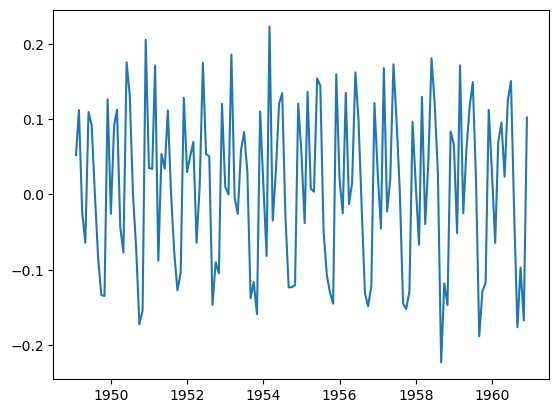

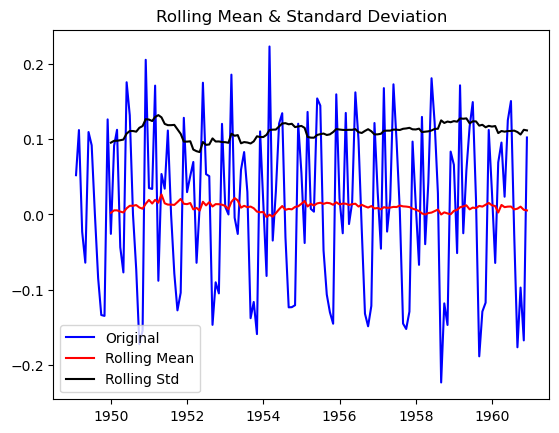

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64
Results of KPSS Test:
Test Statistic           0.038304
p-value                  0.100000
#Lags Used               6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_22204\3752451510.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [15]:
# remove trend and seasonality: differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

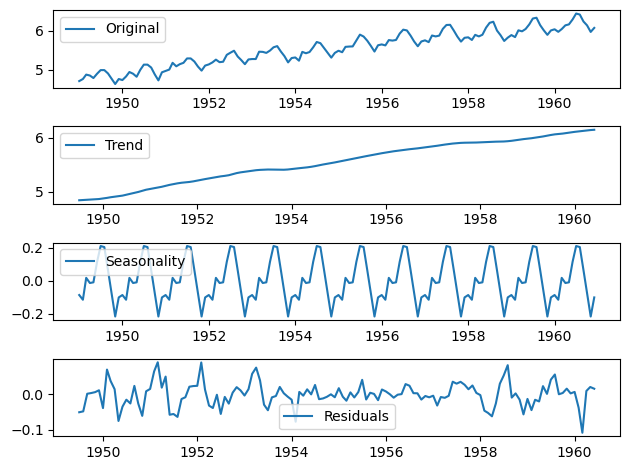

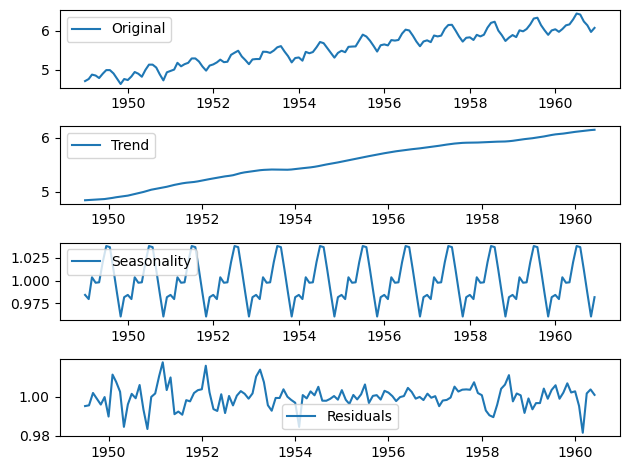

In [16]:
# remove trend and seasonality: decomposing
from statsmodels.tsa.seasonal import seasonal_decompose

# plot components of the additive model
additive_decomposition = seasonal_decompose(ts_log, model='additive')
additive_trend = additive_decomposition.trend
additive_seasonal = additive_decomposition.seasonal
additive_residual = additive_decomposition.resid
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(additive_trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(additive_seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(additive_residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# plot components of the multiplicative model
multiplicative_decomposition = seasonal_decompose(ts_log, model='multiplicative')
multiplicative_trend = multiplicative_decomposition.trend
multiplicative_seasonal = multiplicative_decomposition.seasonal
multiplicative_residual = multiplicative_decomposition.resid
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(multiplicative_trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(multiplicative_seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(multiplicative_residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

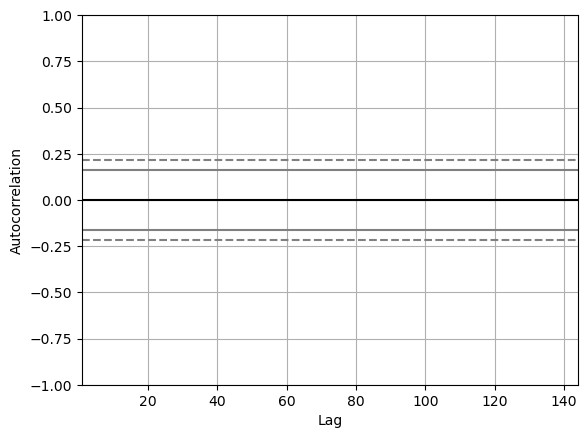

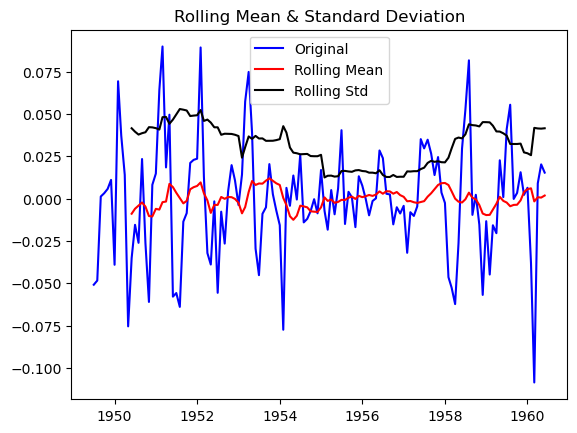

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.023949
p-value                  0.100000
#Lags Used               4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_22204\3752451510.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [17]:
# evaluate autocorrelation of residuals
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(additive_residual)
plt.show()

ts_log_decompose = additive_residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

#### Restructuring TS forecasting as as supervised learning problem

In [18]:
df = pd.read_csv('airline-passengers.csv', index_col=0)
df.index = pd.to_datetime(df.index)

# Transform datetime index to a set of new features
def create_datetime_features(df):
    data = df.copy()
    data['date'] = data.index
    data['hour'] = data['date'].dt.hour
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofyear'] = data['date'].dt.dayofyear
    data['dayofmonth'] = data['date'].dt.day
    data['weekofyear'] = data['date'].dt.isocalendar().week
    
    data.drop(columns=['date'], inplace=True)
    data.dropna(inplace=True)
    return data

# Use Passengers column to create new features
def create_slidingwindow_features(df, target, window=2):
    data = df.copy()
    for i in range(1, window+1):
        data['shift'+str(i)]=data[target].shift(i)
    data.dropna(inplace=True)
    return data

In [19]:
detrend = input("Do you want to reduce trend and seasonality (y/n)? ")
df2 = df
shift = 0 
if detrend == "y":
    import numpy as np
    # reduce trend with log tranformation
    df_log = np.log(df)
    # reduce trend/seasonality with differencing
    df_log_diff = df_log - df_log.shift()
    df2 = df_log_diff
    shift = 1

Do you want to reduce trend and seasonality (y/n)?  y


In [20]:
X1 = create_datetime_features(df2)
X1.head()

,Passengers,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Month,,,,,,,,,
1949-02-01,0.052186,0,1,1,2,1949,32,1,5
1949-03-01,0.112117,0,1,1,3,1949,60,1,9
1949-04-01,-0.022990,0,4,2,4,1949,91,1,13
1949-05-01,-0.064022,0,6,2,5,1949,121,1,17
1949-06-01,0.109484,0,2,2,6,1949,152,1,22


In [21]:
window = 5
X2 = create_slidingwindow_features(df2, 'Passengers', window)
X2.head()

,Passengers,shift1,shift2,shift3,shift4,shift5
Month,,,,,,
1949-07-01,0.091937,0.109484,-0.064022,-0.022990,0.112117,0.052186
1949-08-01,0.000000,0.091937,0.109484,-0.064022,-0.022990,0.112117
1949-09-01,-0.084557,0.000000,0.091937,0.109484,-0.064022,-0.022990
1949-10-01,-0.133531,-0.084557,0.000000,0.091937,0.109484,-0.064022
1949-11-01,-0.134733,-0.133531,-0.084557,0.000000,0.091937,0.109484


Do you want X1 or X2?  X1


0.03952086946726473


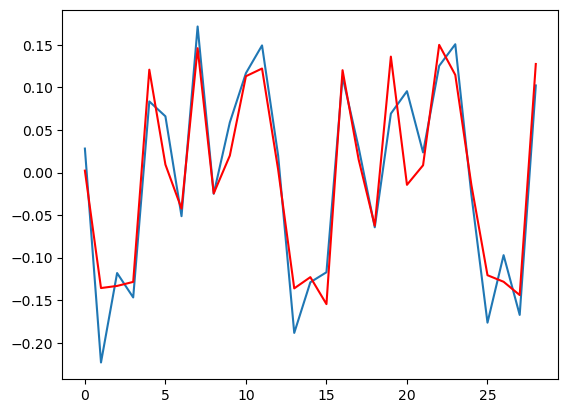

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_selection = input("Do you want X1 or X2? ")
if x_selection == "X1":
    dataset = X1.values
    window = 0
else:
    dataset = X2.values

X = dataset[:, 1:]
y = dataset[:, 0]

# train_test_split function is not used because it extracts random observations from the dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
train_size=0.8

X_train, X_test = X[0:int(train_size*len(X))], X[int(train_size*len(X)):]
y_train, y_test = y[0:int(train_size*len(X))], y[int(train_size*len(X)):]

estimator = RandomForestRegressor(n_estimators=100)

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
print(sqrt(mean_squared_error(y_test, y_pred)))

plt.plot(y_test)
plt.plot(y_pred, color='red')
plt.show()


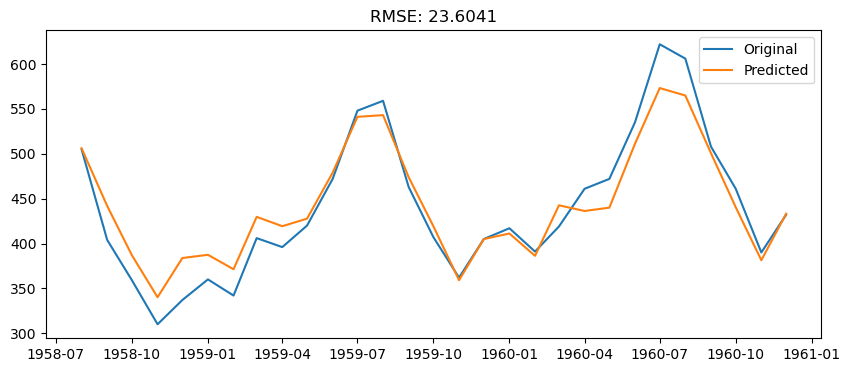

In [23]:
# RETURN Y_PRED TO THE ORIGINAL SCALE
if shift == 1: # check whether log-transformation and differencing was applied
    y_pred_cumsum = y_pred.cumsum()
    # create a series with all values as base number and add the differences to it
    y_pred_log = pd.Series(df_log["Passengers"].iloc[int(train_size*len(X))+shift+window], index=df.index[int(train_size*len(X))+shift+window:])
    
    y_pred_log = y_pred_log.add(y_pred_cumsum,fill_value=0)
    # take the exponent and compare with the original series
    y_pred_orig = np.exp(y_pred_log)
else:
    # create a series with all values as base number and add the differences to it
    y_pred_orig = pd.Series(y_pred, index=df.index[int(train_size*len(X))+shift+window:])
    
plt.figure(figsize=(10,4))
plt.plot(df["Passengers"][int(train_size*len(X))+shift+window:], label='Original')
plt.plot(y_pred_orig, label='Predicted')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((y_pred_orig-df["Passengers"][int(train_size*len(X))+shift+window:])**2)/len(df["Passengers"][int(train_size*len(X))+shift+window:])))
plt.show()